<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">


<center><h1 style="font-size:2em;color:#2467C0"> Detectores 
 </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/portada.png" align="middle" style="width:550px;"/></td>
<td>
    
    
**Objetivo:**
    
    
En esta lección se mostrará el uso del clasificador Haar Cascade para encontrar  características faciales en  imagenes.
   
<br>
</td>
</tr>
</table>

# Cargar librerias

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

## Algoritmo Haar Cascade

El algoritmo de Haar Cascade es uno de los métodos clásicos de detección de rostros desarrollado por Paul Viola y Michael Jones en 2001. Se basa en el uso de características Haar (patrones de contraste claros y oscuros en distintas regiones de la imagen), combinadas con un clasificador en cascada entrenado mediante AdaBoost.
Este enfoque permite descartar rápidamente regiones que no contienen rostros y concentrar el procesamiento en aquellas más prometedoras, logrando así un detector rápido y relativamente eficiente incluso en computadoras con recursos limitados.


Aunque hoy en día existen técnicas más avanzadas basadas en redes neuronales profundas, como las implementadas en el módulo DNN de OpenCV, el método de Haar Cascade sigue siendo ampliamente utilizado en aplicaciones educativas y de prototipado debido a su simplicidad, disponibilidad en OpenCV y facilidad de uso en tiempo real.

## a) Detección de rostros

<function matplotlib.pyplot.show(close=None, block=None)>

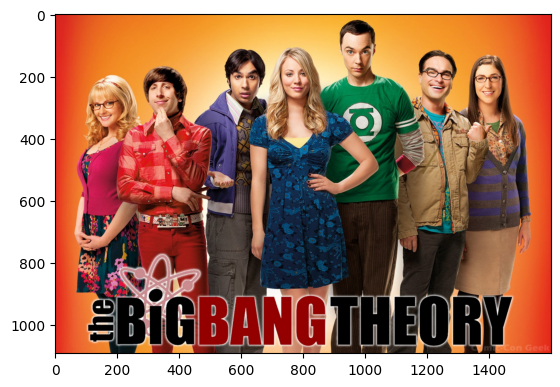

In [49]:
#Mostramos la imagen original
img = cv.imread('figuras/bbt.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show

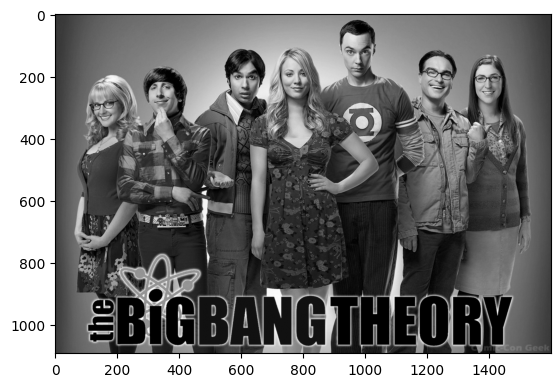

In [50]:
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gris, cmap='gray')
plt.show()


In [51]:
detector_rostros = cv.CascadeClassifier('datos/haarcascade_frontalface_default.xml')

In [52]:
detector_rostros.detectMultiScale(img_gris, scaleFactor=1.1, minNeighbors=10)

array([[ 911,   71,  131,  131],
       [1172,  142,  126,  126],
       [ 719,  148,  116,  116],
       [ 555,  159,  117,  117],
       [1339,  166,  110,  110],
       [ 285,  195,  109,  109],
       [ 101,  252,  106,  106]], dtype=int32)

In [53]:
rostros = detector_rostros.detectMultiScale(img_gris, scaleFactor=1.1, minNeighbors=10) #Scale Factor es la sensibilidad de deteccion, el para evitar el traslape

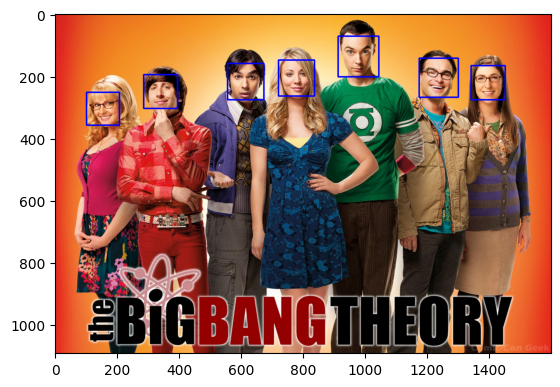

In [54]:
img = cv.imread('figuras/bbt.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#cv.rectangle(img, (911,71), (911+133, 71+133), (0,0,255), 4)
for(x, y, w, h) in rostros:
    cv.rectangle(img, (x,y), (x + w, y + h), (0,0,255), 4)
plt.imshow(img)
plt.show()

### b) Sonrisas 

<td><img src="figuras/ejemplo.jpeg" align="middle" style="width:550px;"/></td>

In [55]:
detector_sonrisas = cv.CascadeClassifier('datos/haarcascade_smile.xml')

In [56]:
sonrisas = detector_sonrisas.detectMultiScale(img_gris, scaleFactor=2, minNeighbors=15) #Scale Factor es la sensibilidad de deteccion, el para evitar el traslape

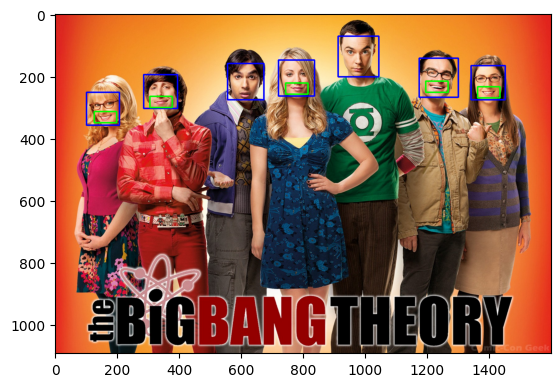

In [57]:
img = cv.imread('figuras/bbt.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

for (x, y, w, h) in rostros:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 4)
    for (x_s, y_s, w_s, h_s) in sonrisas:
        if x_s > x and x_s+w_s < x+w and y_s > y and y_s+h_s < y+h:
            cv.rectangle(img, (x_s, y_s), (x_s+w_s, y_s+h_s), (0, 255, 0), 4)
plt.imshow(img)
plt.show()

### c) Ojos

In [58]:
detector_ojos = cv.CascadeClassifier('datos/haarcascade_eye.xml')

In [59]:
ojos = detector_ojos.detectMultiScale(img_gris, scaleFactor=1.03, minNeighbors=20)

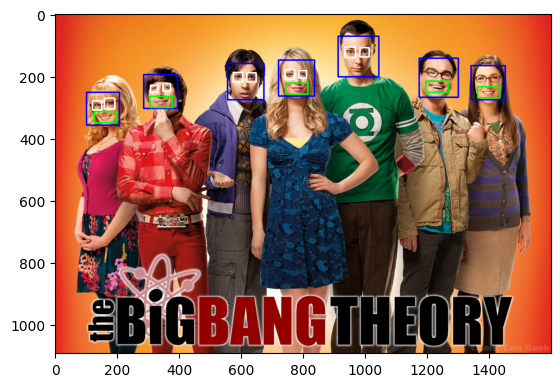

In [60]:
img = cv.imread('figuras/bbt.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

for (x, y, w, h) in rostros:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 4)
    for (x_s, y_s, w_s, h_s) in sonrisas:
        if x_s > x and x_s+w_s < x+w and y_s > y and y_s+h_s < y+h:
            cv.rectangle(img, (x_s, y_s), (x_s+w_s, y_s+h_s), (0, 255, 0), 4)
    for (x_e, y_e, w_e, h_e) in ojos:
        if x_e > x and x_e+w_e < x+w and y_e > y and y_e+h_e < y+h:
            cv.rectangle(img, (x_e, y_e), (x_e+w_e, y_e+h_e), (255, 255, 255), 4)
            
plt.imshow(img)
plt.show()

## Reconocimiento de rostros con redes neuronales convolucionales

El modelo de detección de rostros de OpenCV se basa en una red neuronal convolucional preentrenada con el algoritmo SSD (Single Shot Multibox Detector) y una arquitectura ligera ResNet-10.
Los archivos opencv_face_detector_uint8.pb y opencv_face_detector.pbtxt contienen, respectivamente, los pesos de la red en formato TensorFlow y la descripción de la arquitectura.
Gracias a ellos es posible cargar el modelo directamente con la API cv2.dnn de OpenCV y realizar detección de rostros en imágenes con buena precisión y en tiempo real, sin necesidad de entrenar desde cero.

In [61]:
import cv2
import matplotlib.pyplot as plt

# Archivos del modelo
pb = "datos/opencv_face_detector_uint8.pb"
pbtxt = "datos/opencv_face_detector.pbtxt"
net = cv2.dnn.readNetFromTensorflow(pb, pbtxt)


In [62]:
# Cargar imagen y definir dimensiones
img = cv2.imread("figuras/bbt.jpeg")
(h, w) = img.shape[:2]
print(h, ' ', w)


1093   1600


In [63]:
# Preparar blob es decir, las características de entrada para la red
blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)),
                             scalefactor=1.0,
                             size=(300, 300),
                             mean=(104.0, 177.0, 123.0),  # BGR
                             swapRB=False, crop=False)


In [64]:
# Cargar la imagen en la red
net.setInput(blob)

# Realizar la detección
detections = net.forward()

In [65]:
#detections #[[[[datos]]]]
detections[0][0][0]

array([0.        , 1.        , 0.9940128 , 0.5752472 , 0.05310225,
       0.6405632 , 0.19019635], dtype=float32)

In [66]:
# Agregar los cuadros de la detección a la imagen original
for i in range(detections.shape[2]):
    conf = detections[0][0][i][2]
    if conf > 0.5:
        x1, y1, x2, y2 = (detections[0][0] [i] [3:7] * [w, h, w, h]).astype(int)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.putText(img, f"{conf*100:.1f}%", (x1, y1-8),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 3)

In [67]:
# Convertir de BGR (OpenCV) a RGB (Matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


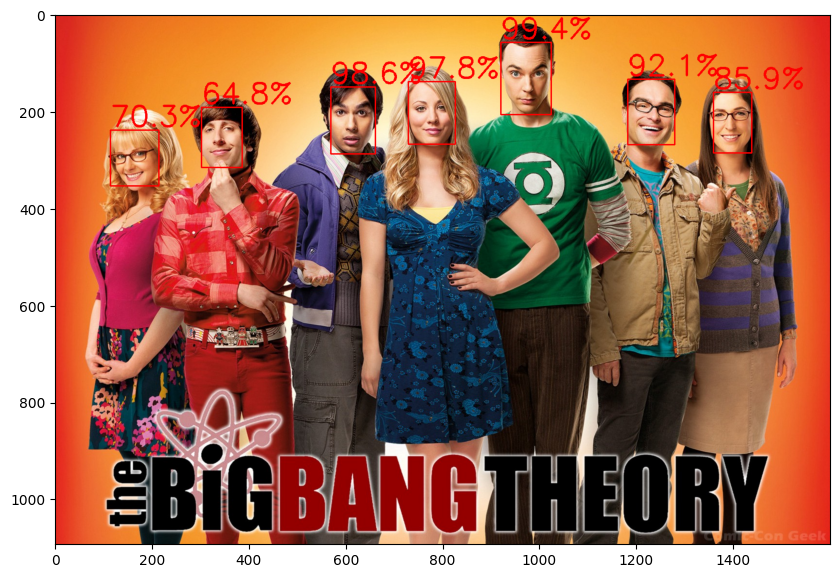

In [68]:
# Mostrar con matplotlib
plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.show()

# Proyecto individual

<div class="alert alert-success">
   
A partir de la imagen "figuras/rostros.png", aplicar un desenfoque sobre las regiones donde se detecten rostros,  utilizando los dos métodos de detección implementados previamente.
    
</div> 

<td><img src="figuras/rostros_blur.jpg" align="middle" style="width:850px;"/></td>

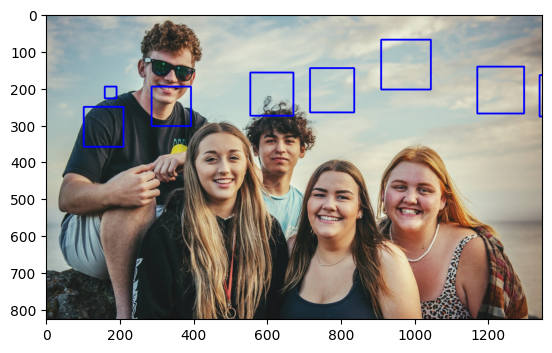

In [69]:
detector_rostros = cv.CascadeClassifier('datos/haarcascade_frontalface_default.xml')
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

rostros = detector_rostros.detectMultiScale(img_gris, scaleFactor=1.03, minNeighbors=14)
img = cv.imread('figuras/rostros.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
for(x, y, w, h) in rostros:
    cv.rectangle(img, (x,y), (x + w, y + h), (0,0,255), 4)
plt.imshow(img)
plt.show()